# Premières statistiques descriptives sur les données INSEE

## Importation des données et des cartes

In [1]:
import geopandas as gpd
import pandas as pd
import requests
from io import BytesIO  
from zipfile import ZipFile
import tempfile
import os
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from donnees_INSEE import donnees_INSEE
from donnees_IDFM import donnees_stations_toutes
import cartiflette.s3 as s3

Les commandes suivantes permettent de faire des cartes avec cartiflette.

In [2]:
!pip install pandas fiona shapely pyproj rtree
!pip install geopandas
!pip install topojson

In [3]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-myv_2xb_
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-myv_2xb_
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bcc2617948a5f9b1a'
  Running command git fetch -q https://github.com/inseefrlab/cartiflette 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Running command git checkout -q 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Resolved https://github.com/inseefrlab/cartiflette to commit 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Importation des données INSEE

In [4]:
data = donnees_INSEE()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [5]:
stations=donnees_stations_toutes()

In [6]:
shp_communes = s3.download_vectorfile_url_all(
    crs = 4326,
    values = ["75", "92", "93", "94", "77", "78", "91", "95"],
    borders="COMMUNE",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 14.5kiB [00:00, 8.68MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 62.3kiB [00:00, 15.8MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 119kiB [00:00, 17.0MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 110kiB [00:00, 22.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=77/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.56MiB [00:00, 47.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=78/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 576kiB [00:00, 32.1MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=91/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 479kiB [00:00, 37.0MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=95/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 368kiB [00:00, 30.6MiB/s]


In [7]:
arrondissements = s3.download_vectorfile_url_all(
    crs = 4326,
    values = ["75"],
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 11.4MiB/s]


In [8]:
shp_communes = pd.concat(
  [
    shp_communes.loc[shp_communes['INSEE_DEP'] != "75"].to_crs(2154),
    arrondissements.to_crs(2154)
  ])

## Statistiques de base
### Vérification des bases (pre-processing)

In [9]:
stations_socio = gpd.sjoin(stations, data, how='inner', predicate='intersects')

In [10]:
stations_socio.head()

,Geo Point,Geo Shape,gares_id,nom_long,nom_so_gar,nom_su_gar,id_ref_ZdC,nom_ZdC,id_ref_ZdA,nom_ZdA,...,ind_18_24,ind_25_39,ind_40_54,ind_55_64,ind_65_79,ind_80p,ind_inc,pre_IDF,select,expt
0,"48.83908975449538, 2.2704582437872416","{""coordinates"": [2.270458243787242, 48.8390897...",57,Pont du Garigliano,Hôpital Européen Georges Pompidou,NaN,74002,Pont du Garigliano - Hôpital Européen G. Pompidou,58798,Pont du Garigliano - Hôpital Européen G. Pompidou,...,1279.0,3241.0,3167.5,1862.5,2160.0,1156.0,9.0,1.0,1,1
129,"48.84524756452023, 2.261623492404885","{""coordinates"": [2.261623492404885, 48.8452475...",544,Michel Ange-Molitor,NaN,NaN,73658,Michel-Ange - Molitor,44139,Michel-Ange - Molitor,...,1279.0,3241.0,3167.5,1862.5,2160.0,1156.0,9.0,1.0,1,1
348,"48.83807588962523, 2.271174403433847","{""coordinates"": [2.271174403433847, 48.8380758...",978,Pont du Garigliano,Hôpital Européen Georges Pompidou,NaN,74002,Pont du Garigliano - Hôpital Européen G. Pompidou,58798,Pont du Garigliano - Hôpital Européen G. Pompidou,...,1279.0,3241.0,3167.5,1862.5,2160.0,1156.0,9.0,1.0,1,1
370,"48.84505817137918, 2.261745124963671","{""coordinates"": [2.261745124963671, 48.8450581...",545,Michel Ange-Molitor,NaN,NaN,73658,Michel-Ange - Molitor,44139,Michel-Ange - Molitor,...,1279.0,3241.0,3167.5,1862.5,2160.0,1156.0,9.0,1.0,1,1
1128,"48.84520470264663, 2.2664415417194004","{""coordinates"": [2.2664415417194, 48.845204702...",149,Chardon Lagache,NaN,NaN,71141,Chardon Lagache,42543,Chardon Lagache,...,1279.0,3241.0,3167.5,1862.5,2160.0,1156.0,9.0,1.0,1,1


In [11]:
stations.shape

(1196, 28)

In [12]:
stations_socio.shape

(1176, 63)

_remarque_ : certaines stations sont situées en dehors de carreaux de l'Insee (20 exactement). On les identifie pour vérifier qu'il ne s'agit pas d'un problème ; on pourra les rajouter avec des valeurs nulles par exemple.

Une première carte permet d'identifier que ces points sont effectivement marginaux.

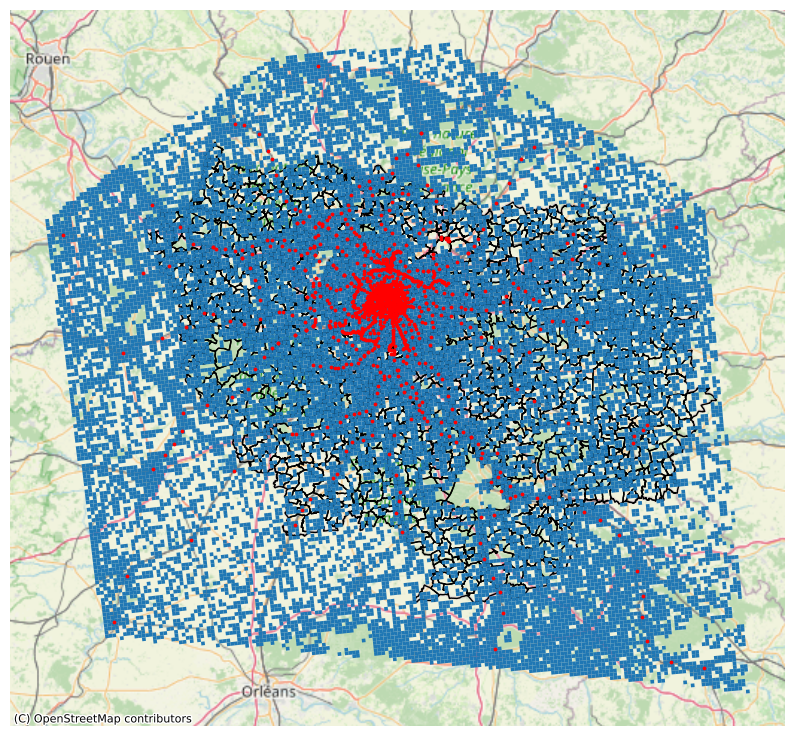

In [13]:
fig,ax = plt.subplots(figsize=(10, 10))
#data.to_crs(3857).plot(ax = ax, color = 'red', alpha = 0.4, zorder=2)
shp_communes.to_crs(3857).plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none",
                                                           color = None)
data.to_crs(3857).plot(ax=ax)
stations.to_crs(3857).plot(ax = ax, markersize=3, color="red")
ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

In [14]:
stations.columns

Index(['Geo Point', 'Geo Shape', 'gares_id', 'nom_long', 'nom_so_gar',
       'nom_su_gar', 'id_ref_ZdC', 'nom_ZdC', 'id_ref_ZdA', 'nom_ZdA',
       'idrefliga', 'idrefligc', 'res_com', 'indice_lig', 'mode_', 'tertrain',
       'terrer', 'termetro', 'tertram', 'terval', 'exploitant', 'idf',
       'principal', 'x', 'y', 'picto ligne', 'nom_iv', 'geometry'],
      dtype='object')

In [15]:
fusion = pd.merge(stations, stations_socio, on='Geo Point', how='outer', indicator=True)
elements_uniques = fusion[fusion['_merge'] == 'left_only']
elements_uniques

,Geo Point,Geo Shape_x,gares_id_x,nom_long_x,nom_so_gar_x,nom_su_gar_x,id_ref_ZdC_x,nom_ZdC_x,id_ref_ZdA_x,nom_ZdA_x,...,ind_25_39,ind_40_54,ind_55_64,ind_65_79,ind_80p,ind_inc,pre_IDF,select,expt,_merge
42,"48.869950134005364, 2.7822267234490363","{""coordinates"": [2.782226723449036, 48.8699501...",182,Marne-la-Vallée-Chessy,NaN,NaN,68385,Marne-la-Vallée Chessy,43239,Marne-la-Vallée Chessy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
130,"49.004725623562045, 2.5712948444359345","{""coordinates"": [2.571294844435934, 49.0047256...",1005,Terminal 2 - Gare TGV,NaN,NaN,73699,Aéroport CDG - Terminal 2 (TGV),473364,Aéroport Charles de Gaulle 2 (Terminal 2),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
258,"49.010044959106736, 2.570640068890432","{""coordinates"": [2.570640068890432, 49.0100449...",1004,Parc PX,NaN,NaN,73595,NC,52244,Parc Px,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
294,"48.867950141858145, 2.0508259503050965","{""coordinates"": [2.050825950305097, 48.8679501...",1257,Saint-Nom La Bretèche - Forêt de Marly,NaN,NaN,64382,Saint-Nom-la-Bretèche Forêt de Marly,480907,Saint-Nom-la-Bretèche Forêt de Marly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
296,"49.00975645120457, 2.5612326952251054","{""coordinates"": [2.561232695225105, 49.0097564...",743,Aéroport Charles De Gaulle 1,NaN,NaN,73596,Aéroport CDG 1 (Terminal 3),462398,Aéroport CDG 1 (Terminal 3) - RER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
351,"48.97342490628139, 2.5143602855334923","{""coordinates"": [2.514360285533492, 48.9734249...",621,Parc des Expositions,NaN,NaN,73568,Parc des Expositions,47878,Parc des Expositions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
404,"49.010001865217326, 2.5605588439018763","{""coordinates"": [2.560558843901876, 49.0100018...",1003,Terminal 3 - Roissypole,NaN,NaN,73596,Aéroport CDG 1 (Terminal 3),462398,Aéroport CDG 1 (Terminal 3) - RER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
549,"48.73860387112344, 2.3699077892556843","{""coordinates"": [2.369907789255684, 48.7386038...",1156,Caroline Aigle,Orlyfret,NaN,69606,Caroline Aigle (Orlyfret),58781,Caroline Aigle (Orlyfret),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
553,"49.00897846001637, 2.5448318979171196","{""coordinates"": [2.54483189791712, 49.00897846...",1002,Parc PR,NaN,NaN,74162,NC,59080,Parc Pr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
554,"49.01340270384009, 2.541951696822007","{""coordinates"": [2.541951696822007, 49.0134027...",1001,Terminal 1,NaN,NaN,69212,NC,42163,Aéroport CDG - Terminal 1 (CDGVAL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


Nous trouvons que la plupart des gares concernées sont situés au coeur d'infrastructures. Par exemple il n'y a pas de carreaux Insee au niveau des aéroports puisqu'il n'y a pas d'habitations. Cependant, ces gares sont importantes et non négligeables en termes de fréquentation : il ne faut pas les retirer mais plutot mettre les données socio-démographiques à 0. D'autres gares sont plus marginales, comme celle de Saint-Nom-la-Bretèche qui se situe en bordure de foret

_remarque_ : certaines gares sont en doubles, cela vient du fait qu'elles sont listées pour chaque mode de transport (et certains terminaux ont le RER et le Val par exemple).

On décide de repartir de cette table avec les 20 élements manquants et de la rajouter à la table issue de la première jointure.

In [16]:
elements_ajout=elements_uniques.drop(columns=['Geo Shape_y', 'gares_id_y',
       'nom_long_y', 'nom_so_gar_y', 'nom_su_gar_y', 'id_ref_ZdC_y',
       'nom_ZdC_y', 'id_ref_ZdA_y', 'nom_ZdA_y', 'idrefliga_y', 'idrefligc_y',
       'res_com_y', 'indice_lig_y', 'mode__y', 'tertrain_y', 'terrer_y',
       'termetro_y', 'tertram_y', 'terval_y', 'exploitant_y', 'idf_y',
       'principal_y', 'x_y', 'y_y', 'picto ligne_y', 'nom_iv_y', 'geometry_y', '_merge'])

In [19]:
nouveaux_noms = {col: col.rstrip('_x') if col.endswith('_x') else col for col in elements_ajout.columns}
elements_ajout.rename(columns=nouveaux_noms, inplace=True)
elements_ajout.rename(columns={"mode" : "mode_"}, inplace=True)

In [20]:
colonnes_a_modifier = ['ind', 'men', 'men_pauv', 'men_1ind', 'men_5ind', 'men_prop', 'men_fmp', 'ind_snv',
                       'men_surf', 'men_coll', 'men_mais', 'log_av45', 'log_45_70', 'log_70_90', 'log_ap90',
                       'log_inc', 'log_soc', 'ind_0_3', 'ind_4_5', 'ind_6_10', 'ind_11_17', 'ind_18_24',
                       'ind_25_39', 'ind_40_54', 'ind_55_64', 'ind_65_79', 'ind_80p']

# Remplacer toutes les valeurs des colonnes spécifiées par des zéros
for colonne in colonnes_a_modifier:
    elements_ajout[colonne] = 0

In [21]:
elements_ajout.head()

,Geo Point,Geo Shape,gares_id,nom_long,nom_so_gar,nom_su_gar,id_ref_ZdC,nom_ZdC,id_ref_ZdA,nom_ZdA,...,ind_18_24,ind_25_39,ind_40_54,ind_55_64,ind_65_79,ind_80p,ind_inc,pre_IDF,select,expt
42,"48.869950134005364, 2.7822267234490363","{""coordinates"": [2.782226723449036, 48.8699501...",182,Marne-la-Vallée-Chessy,NaN,NaN,68385,Marne-la-Vallée Chessy,43239,Marne-la-Vallée Chessy,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
130,"49.004725623562045, 2.5712948444359345","{""coordinates"": [2.571294844435934, 49.0047256...",1005,Terminal 2 - Gare TGV,NaN,NaN,73699,Aéroport CDG - Terminal 2 (TGV),473364,Aéroport Charles de Gaulle 2 (Terminal 2),...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
258,"49.010044959106736, 2.570640068890432","{""coordinates"": [2.570640068890432, 49.0100449...",1004,Parc PX,NaN,NaN,73595,NC,52244,Parc Px,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
294,"48.867950141858145, 2.0508259503050965","{""coordinates"": [2.050825950305097, 48.8679501...",1257,Saint-Nom La Bretèche - Forêt de Marly,NaN,NaN,64382,Saint-Nom-la-Bretèche Forêt de Marly,480907,Saint-Nom-la-Bretèche Forêt de Marly,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
296,"49.00975645120457, 2.5612326952251054","{""coordinates"": [2.561232695225105, 49.0097564...",743,Aéroport Charles De Gaulle 1,NaN,NaN,73596,Aéroport CDG 1 (Terminal 3),462398,Aéroport CDG 1 (Terminal 3) - RER,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


Maintenant que le traitement est fait il ne reste plus qu'à ajouter les lignes dans la table originale. On vérifie ensuite que le nombre de stations correspond effectivement au résultat attendu.

In [22]:
stations_socio = gpd.GeoDataFrame(pd.concat([stations_socio, elements_ajout], ignore_index=True))

In [23]:
stations.shape

(1196, 28)

In [24]:
stations_socio.shape

(1196, 64)

In [25]:
stations_socio_RER=stations_socio[stations_socio['mode_']=="RER"]

In [26]:
stations_socio_RER.shape

(258, 64)

In [27]:
stations_RER=stations[stations["mode_"]=="RER"]
stations_RER.shape

(258, 28)

Tout est bon !

### Premiers élements de statistiques descriptives

In [28]:
stations_socio_RER.loc[:,["ind", "men", "men_pauv", "men_1ind", "men_5ind", 'men_prop', 'men_fmp', 'ind_snv',
       'men_surf', 'men_coll', 'men_mais', 'log_av45', 'log_45_70',
       'log_70_90', 'log_ap90', 'log_inc', 'log_soc', 'ind_0_3', 'ind_4_5',
       'ind_6_10', 'ind_11_17', 'ind_18_24', 'ind_25_39', 'ind_40_54',
       'ind_55_64', 'ind_65_79', 'ind_80p']].describe()

,ind,men,men_pauv,men_1ind,men_5ind,men_prop,men_fmp,ind_snv,men_surf,men_coll,...,ind_0_3,ind_4_5,ind_6_10,ind_11_17,ind_18_24,ind_25_39,ind_40_54,ind_55_64,ind_65_79,ind_80p
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,2.580000e+02,2.580000e+02,258.000000,...,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,6958.168605,3095.978682,452.587597,1274.290698,250.649225,1281.737984,346.756977,2.076038e+08,2.046584e+05,2634.837984,...,361.278682,181.417442,438.312791,573.963566,514.985271,1667.187984,1401.268992,761.020930,740.654264,301.479845
std,6565.425026,3288.779242,543.386504,1675.109671,232.861531,1219.675800,310.797756,2.459345e+08,1.991611e+05,3294.066721,...,311.134041,150.511402,362.843869,491.154480,461.740678,1816.430896,1330.250619,736.499395,799.536591,352.969533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2341.375000,976.075000,84.500000,313.575000,86.150000,485.275000,119.025000,6.085518e+07,7.827025e+04,555.175000,...,113.375000,58.075000,159.150000,210.700000,189.250000,455.075000,463.775000,246.500000,244.750000,92.000000
50%,5816.000000,2384.000000,270.450000,787.500000,201.050000,976.500000,279.000000,1.390299e+08,1.615635e+05,1703.500000,...,319.450000,158.750000,395.600000,493.300000,433.950000,1336.000000,1148.500000,604.000000,530.000000,190.550000
75%,8703.625000,3711.250000,625.675000,1514.000000,348.500000,1597.750000,458.000000,2.409100e+08,2.449640e+05,3323.000000,...,505.225000,255.350000,597.000000,746.025000,663.450000,2102.725000,1774.100000,962.825000,867.500000,352.250000
max,35842.500000,19389.000000,2735.000000,10430.000000,1663.000000,7360.000000,1648.000000,1.495966e+09,1.247443e+06,19313.000000,...,1932.500000,783.500000,2097.500000,2850.500000,2634.000000,12049.000000,6872.000000,3851.000000,4452.000000,2229.000000


Text(0, 0.5, 'Fréquence')

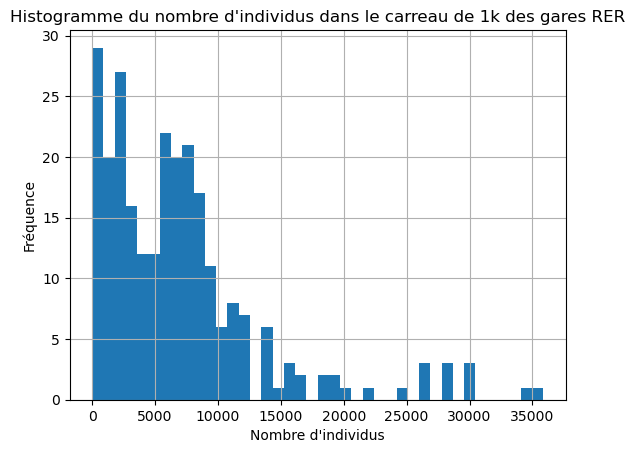

In [31]:
stations_socio_RER["ind"].hist(bins=40)
plt.title("Histogramme du nombre d'individus dans le carreau de 1k des gares RER")
plt.xlabel("Nombre d'individus")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

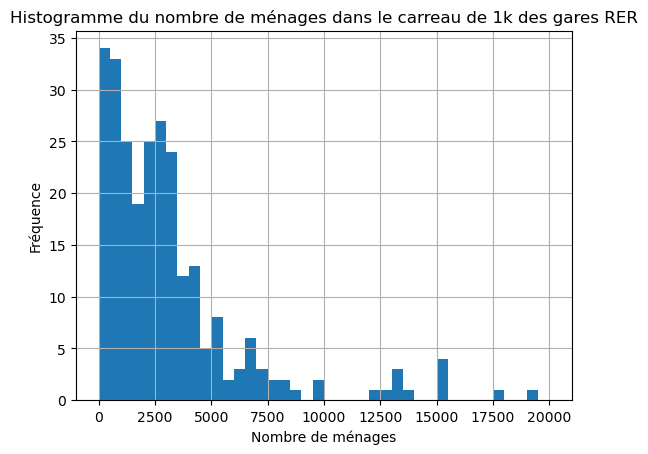

In [39]:
stations_socio_RER["men"].hist(bins=40, range=(0,20000))
plt.title("Histogramme du nombre de ménages dans le carreau de 1k des gares RER")
plt.xlabel("Nombre de ménages")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

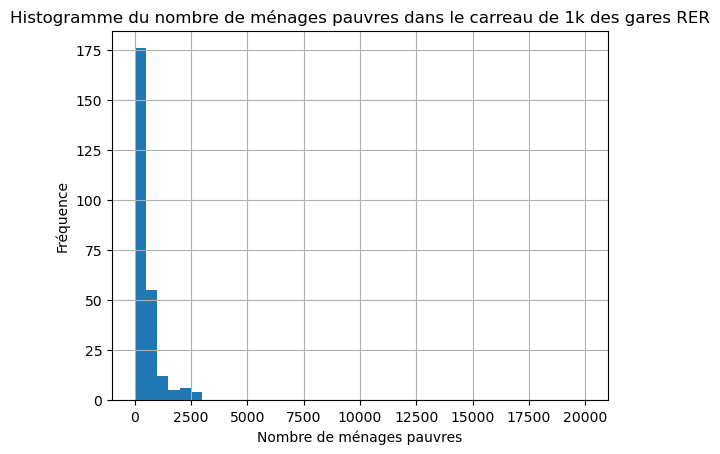

In [40]:
stations_socio_RER["men_pauv"].hist(bins=40, range=(0,20000))
plt.title("Histogramme du nombre de ménages pauvres dans le carreau de 1k des gares RER")
plt.xlabel("Nombre de ménages pauvres")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

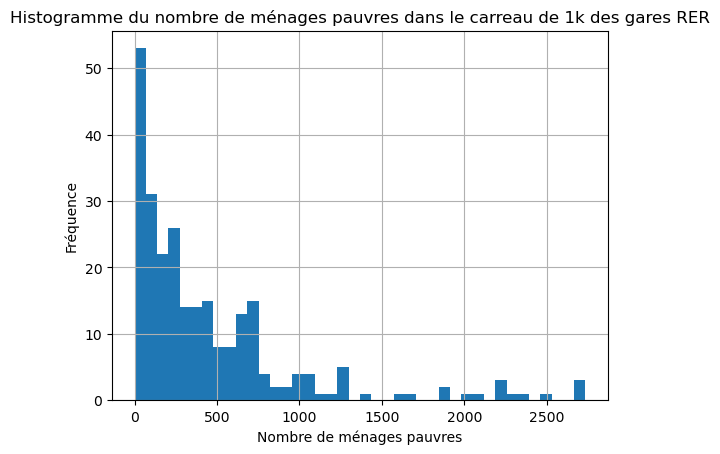

In [42]:
stations_socio_RER["men_pauv"].hist(bins=40)
plt.title("Histogramme du nombre de ménages pauvres dans le carreau de 1k des gares RER")
plt.xlabel("Nombre de ménages pauvres")
plt.ylabel("Fréquence")